1. Вы хотите узнать, как много значит ранг игрока в теннисе. Проверьте следующие утверждения:

а) Если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью. (Если хотите проверить статистически — формируйте выборку как отклонение от ожидаемого количества побед при случайном исходе);

Этапы - 
1. Объединение таблиц.
2. EDA. Очистка данных.
3. Отбор матчей в которых разброс по рейтингам между игроков более  20 пунктов.
4. Посчитать долю матчей в которых выиграл игрок с высоким рейтингом и сравнить ее с 50% вероятностью побед.
5. Провести статистический тест на проверку результатов. В данном случае из задачи не понятно что с чем сравнивать - проведу три теста - первый хи квадрат тест так как категориальные признаки из двух групп и сравниваем независимости (или тест на ассоциацию) Он позволяет проверить, существует ли статистически значимая ассоциация между двумя категориальными переменными, учитывая вероятность победы. Тест Мана-Уитни на сравнение средних величин в группах, где ранг был больше 20 пунктов и меньше 20 пунктов, учитывая отсутсвие нормальности распределения данных, и третий тест - Z- test - если сравнить вероятность победы в среднем в группе с высоким рангом по отношению к средней вероятности победы - равной 50%.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188934 entries, 0 to 188933
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          188934 non-null  object 
 1   tourney_name        188934 non-null  object 
 2   surface             185997 non-null  object 
 3   draw_size           188099 non-null  float64
 4   tourney_level       188934 non-null  object 
 5   tourney_date        188934 non-null  int64  
 6   match_num           188934 non-null  int64  
 7   winner_id           188934 non-null  int64  
 8   winner_seed         69676 non-null   float64
 9   winner_entry        16270 non-null   object 
 10  winner_name         188934 non-null  object 
 11  winner_hand         188922 non-null  object 
 12  winner_ht           172230 non-null  float64
 13  winner_ioc          188926 non-null  object 
 14  winner_age          187625 non-null  float64
 15  loser_id            188934 non-nul

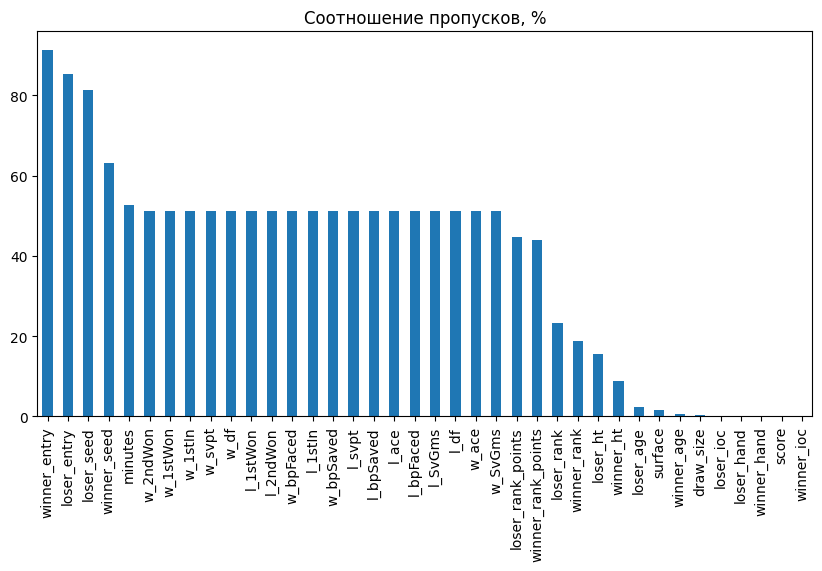

In [43]:
#объдинение все таблицы в один data frame
import pandas as pd # импорт библиотек
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import kstest, norm


# Создание пустого списка для хранения датафреймов
dataframes = []

# Чтение каждого файла и добавление к нему столбца года
for year in range(1968, 2023):
    df = pd.read_csv(f"D://IDE/tennis_atp-master/atp_matches_{year}.csv")
    
    # Добавление столбца года
    df['year'] = year
    
    # Добавление датафрейма в список
    dataframes.append(df)

# Объединение всех датафреймов в один с сохранением порядка строк
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.tail()

combined_df.info()
def plot_missing_values(df):
    """
    Функция для построения столбчатой диаграммы, отображающей процент пропущенных значений в каждом столбце датафрейма.

    Args:
        df (pandas.DataFrame): Входной датафрейм.

    Returns:
        None
    """
    # Вычисление процента пропущенных значений
    nans = 100 * df.isnull().mean().sort_values(ascending=False)[df.isnull().mean().sort_values(ascending=False) > 0]

    # Построение столбчатой диаграммы
    nans.plot(
        kind='bar', 
        logy=False,
        figsize=(10,5),
        title='Соотношение пропусков, %'
    )
plot_missing_values(combined_df)



In [44]:
# удаляем столбец если у него 60% или более значений отсутствует
combined_df = combined_df.dropna(axis=1, thresh=(0.4 * combined_df.shape[0]))
combined_df.to_csv("D://IDE/combinet_df.csv")


In [45]:
combined_df_with_colums = combined_df.drop(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
 'match_num', 'winner_id', 'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age', 'loser_id',
 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace',
 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
 'l_SvGms', 'l_bpSaved', 'l_bpFaced'], axis=1)
                                           
combined_df_with_colums.tail() # delete all colums which don't need 

,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
188929,1103.0,9.0,1130.0,8.0,2022
188930,808.0,23.0,1390.0,4.0,2022
188931,1059.0,10.0,1881.0,1.0,2022
188932,NaN,NaN,NaN,NaN,2022
188933,NaN,NaN,NaN,NaN,2022


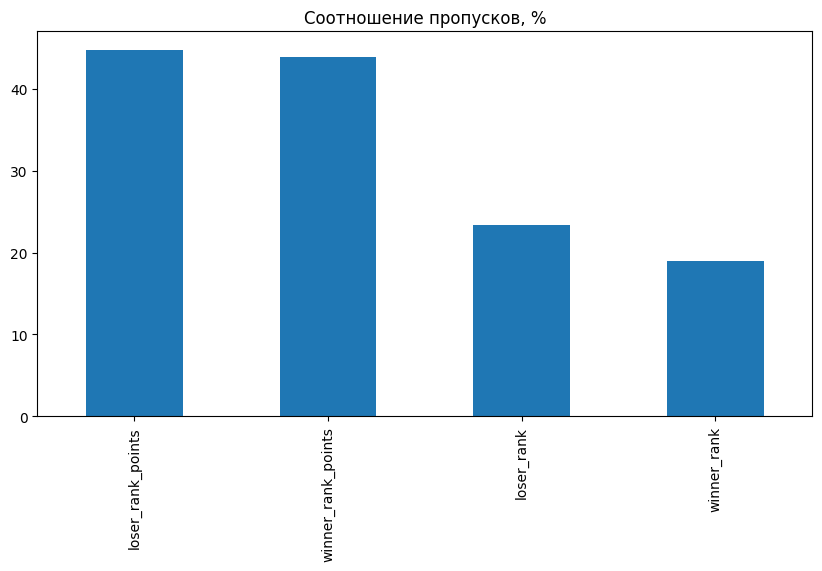

In [46]:
plot_missing_values(combined_df_with_colums)

In [47]:
# Удаление строк, где значение является NaN
cleaned_df = combined_df_with_colums.dropna(subset=['winner_rank', "loser_rank", "winner_rank_points", "loser_rank_points"])
cleaned_df.head()

,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
18469,174.0,0.0,123.0,0.0,1973
18474,105.0,0.0,189.0,0.0,1973
18477,42.0,0.0,77.0,0.0,1973
18483,179.0,0.0,199.0,0.0,1973
18484,40.0,0.0,90.0,0.0,1973


In [48]:
print(cleaned_df.isnull().sum()) # проверяем что нет пропущенных строк

winner_rank           0
winner_rank_points    0
loser_rank            0
loser_rank_points     0
year                  0
dtype: int64


In [49]:
# проводим Chi-squared test 

matches_with_rank_difference = cleaned_df[abs(cleaned_df['winner_rank'] - cleaned_df['loser_rank']) > 20] # создаем маску для отбора матчей, в которых разница ранга боле 20
matches_with_rank_difference = matches_with_rank_difference.copy()

matches_with_rank_difference.loc[:, 'higher_ranked_winner'] = matches_with_rank_difference.apply(
    lambda row: 1 if (row['winner_rank'] < row['loser_rank']) else 0, axis=1) # создаем бинарные данные победителей матчей

# Рассчитываем ожидаемое количество побед для игроков с более высоким рангом, если бы исходы были случайными
expected_wins = len(matches_with_rank_difference) / 2

# Рассчитываем фактическое количество побед для игроков с более высоким рангом
actual_wins = matches_with_rank_difference['higher_ranked_winner'].sum()

# Для этого анализа мы используем хи-квадрат тест на независимость, учитывая, что сравниваются категориальные переменные из двух групп
# Создаем таблицу сопряженности
contingency_table = np.array([[actual_wins, expected_wins], [len(matches_with_rank_difference) - actual_wins, expected_wins]])

# Выполнение хи-квадрат теста
chi2, p, dof, expected = chi2_contingency(contingency_table, correction=False)
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")
#Учитывая, p-value, есть основание отвергнуть H0 - которая заключалась в том, что вероятности побед игроков с рангом превышающим на 20 пунктов и уступающим на 20 пунктов - равны.
# Следовательно верна альтернативная гипотеза, частота побед выше у игроков, если ранг на 20 пунктов выше.



Chi-squared test statistic: 5494.515693666923
p-value: 0.0


In [50]:
# Поскольку наши данные, не содержат парных наблюдений, а являются двумя отдельными группами из одной совокупности, можно выбрать между t-тестом и U-тестом Манна-Уитни в зависимости от распределения данных.
#Учитывая, что данны распределны не нормально подходит только тест Мана-Уитни.
from scipy.stats import mannwhitneyu

# отфильтруем две группы для сравнения их средних.
matches_with_rank_difference = cleaned_df[abs(cleaned_df['winner_rank'] - cleaned_df['loser_rank']) > 20].copy()
matches_without_significant_rank_difference = cleaned_df[abs(cleaned_df['winner_rank'] - cleaned_df['loser_rank']) <= 20].copy()

# Создаем бинарные данные победителей матчей для каждой группы
matches_with_rank_difference['higher_ranked_winner'] = matches_with_rank_difference.apply(
    lambda row: 1 if (row['winner_rank'] < row['loser_rank']) else 0, axis=1)
matches_without_significant_rank_difference['higher_ranked_winner'] = matches_without_significant_rank_difference.apply(
    lambda row: 1 if (row['winner_rank'] < row['loser_rank']) else 0, axis=1)

# Проводим тест Мана-Уитни
stat, p = mannwhitneyu(matches_with_rank_difference['higher_ranked_winner'], matches_without_significant_rank_difference['higher_ranked_winner'])

print(f"Статистика Мана-Уитни: {stat}")
print(f"p-value: {p}")

# Интерпретация результатов
# p-value меньше уровня значимости 0.05, отвергаем нулевую гипотезу - вероятность выигрыша зависит от разницы рангов между игроками.. 



Статистика Мана-Уитни: 1147611646.5
p-value: 3.115239277673097e-286


In [51]:
#второй вариант сравнение срднего значения побед в выборке где все матчи были между игроками с разбросом более 20 пунктов в ранге со средней 50% вероятностью победы 
from statsmodels.stats.proportion import proportions_ztest

# Предполагаем, что actual_wins - это количество побед игроков с более высоким рангом,
# а len(matches_with_rank_difference) - это общее количество матчей.

count = actual_wins  # количество успешных исходов (побед высокоранговых игроков)
nnobs = len(matches_with_rank_difference)  # общее количество наблюдений (матчей)
value = 0.5  # нулевая гипотеза о том, что доля побед равна 50%
propot = count/nnobs

stat, pval = proportions_ztest(count, nnobs, value)
print(f'Z-statistic: {stat}, P-value: {pval}, всего побед {count} из матчей {nnobs} - {propot}')
# p-value - определяет то, что нудевая гипотеза может быть опровергнута и вероятность выигрыша зависит от разницы рангов между игроками.

Z-statistic: 110.9237639688141, P-value: 0.0, всего побед 52859 из матчей 77113 - 0.6854745633032044


**Вывод по 1А задаче - все три теста показали, что есть основания опровергнуть нулевую гипотезу, а значит если ранг игрока выше более, чем на 20 позиций, то в среднем он будет выигрывать с большей вероятностью.**

## Задача 1. Б 
б) Если ранг игрока находится в окне +-5 позиций, то вероятность победы будет значительно отличаться от гипотезы из предыдущего случая. Для проверки статистической значимости выборку можно сделать как среднее по годам (например, с 1980 по 2022г.). Подумайте, как правильно сформировать репрезентативную выборку.

**Комментарий: так как исходя из задания не полностью понятно, что брать за основу сравнения - конкретного игрока или среднее по группе, я выбрала второй вариант и проведу исследование по группам, не привязывая исследование к конкретному id игрока**

Этапы: 1. Выбрать матчи из всех матчей, которые удовлетыоряют условию.
2. Посчитать каков процент выигрышей у игроков с высоким рангом и с низким соответственно и сравнить этот процент с процентом выигрыша игроков где разница между играками была более 20 пунктов
3. Провести статистический тест на проверку результатов, так как тут две ранговые группы группы и нужно сравнить среднюю вероятность побед в этих группах, подходящим статистическим тестом будет использование z-теста для двух пропорций. Этот тест позволяет определить, есть ли статистически значимое различие между двумя пропорциями побед, учитывая количество матчей в каждой группе. Н0 - среднее количество побед между группой где разброс рангом менее 6 и где разброс рангов более 20 - равны 1.А. НА - среднее количество побед в этих группах не равны.

In [52]:
# Определение матчей, где разница в рангах находится в пределах ±5 позиций
close_rank_matches = combined_df[(combined_df['winner_rank'].notnull()) & (combined_df['loser_rank'].notnull())]
close_rank_matches = close_rank_matches[abs(close_rank_matches['winner_rank'] - close_rank_matches['loser_rank']) <= 5]

# Рассчитываем количество побед для игроков с более высоким рангом и более низким рангом
# Игрок с более высоким рангом побеждает, если его ранг меньше, чем у проигравшего
higher_rank_wins = close_rank_matches[close_rank_matches['winner_rank'] < close_rank_matches['loser_rank']].shape[0]
lower_rank_wins = close_rank_matches.shape[0] - higher_rank_wins

# Расчёт вероятности победы
total_matches = close_rank_matches.shape[0]
probability_higher_rank_wins = higher_rank_wins / total_matches if total_matches > 0 else 0
probability_lower_rank_wins = lower_rank_wins / total_matches if total_matches > 0 else 0
proportion = higher_rank_wins/total_matches

higher_rank_wins, lower_rank_wins, probability_higher_rank_wins, probability_lower_rank_wins, total_matches, proportion




(5187, 4632, 0.5282615337610754, 0.4717384662389245, 9819, 0.5282615337610754)

In [53]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
# Производим z-тест
counts = np.array([proportion, propot])
nobs = np.array([total_matches, nnobs])


z_stat, p_value = proportions_ztest(counts, nobs)

z_stat, p_value

 # Учитывая p-value - нет оснований опровергнуть H0 - Н0 - среднее количество побед между группой где разброс рангом менее 6 и где разброс рангов более 20 - равны 




(1.1217297838407767, 0.26197734889705104)

Задача 2: Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем? Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг. Как изменилось среднее количество сетов, которое победитель затратил на игру? Является ли разница средних этих двух выборок статистически значимой? Выбор статистического теста обоснуйте. 

**Комментарии - так как задание сформулировано не однозначно, не понятно сравнивать ли среднее количество сетов для конкретного игрока или в целом сравнивать какое количество сетов играли игроки в этих двух группах для победы, то я выбираю проверить второй вариант и буду сравнивать группы между собой по критерию - среднее количество сетов по группе, необходимое для победы.**

План решения:
1. Разбить всю выборку на две группы первая - с 1980 по 2001 и вторая - с 2002 по 2022.
2. Посчитать по годам среднее количество сетов, необходимых для победы.
3. Посчитать средне по обеим группам.
4. Проверяем обе группы на нормальность распределения с помощью теста Колмагорова - Смирнова.
4. Сравнить эти две средние между собой. Если распределения близки к нормальным, можно использовать двухвыборочный t-тест для сравнения средних. Если распределения значительно отличаются от нормального, может быть предпочтительнее использовать непараметрический тест, например, тест Манна-Уитни. Н0 - среднее количество сетов, которое победитель затратил на игру в группе с 1980 до 2001 гг равно среднему количеству сетов, которое победитель затратил на игру в группе 2002-2022 гг. НА - эти значения н равны.

In [54]:

# Модифицируем лямбда-функцию для обработки float значений и NaN
combined_df['dash_count'] = combined_df['score'].apply(lambda x: str(x).count('-'))

# Проверка результата
combined_df["dash_count"].tail()

188929    2
188930    3
188931    3
188932    2
188933    2
Name: dash_count, dtype: int64

In [55]:
import pandas as pd
from scipy import stats

# Шаг 1: Разделение выборки на две группы
group1 = combined_df[(combined_df['year'] >= 1980) & (combined_df['year'] <= 2001)]['dash_count']
group2 = combined_df[(combined_df['year'] >= 2002) & (combined_df['year'] <= 2022)]['dash_count']

# Шаг 2: Подсчет среднего количества сетов в каждой группе
mean_group1 = group1.mean()
mean_group2 = group2.mean()
print(f"Среднее количество сетов в первой группе: {mean_group1}")
print(f"Среднее количество сетов во второй группе: {mean_group2}")

# Шаг 3: Проверка на нормальность
ks_stat1, p_value1 = stats.kstest(group1, 'norm')
ks_stat2, p_value2 = stats.kstest(group2, 'norm')
print(f"P-value теста Колмогорова-Смирнова для первой группы: {p_value1}")
print(f"P-value теста Колмогорова-Смирнова для второй группы: {p_value2}")

# p-value < 0.05, распределение считается ненормальным
# Альтернатива для ненормальных распределений - тест Манна-Уитни


Среднее количество сетов в первой группе: 2.5954064045561274
Среднее количество сетов во второй группе: 2.621872938753841
P-value теста Колмогорова-Смирнова для первой группы: 0.0
P-value теста Колмогорова-Смирнова для второй группы: 0.0


In [56]:
from scipy.stats import shapiro 
def shapiro_test(sample_a, sample_b, alpha=0.05):
    H0 = 'Распределения в обеих группах нормальные'
    H1 = 'Распределение в одной или обеих группах отлично от нормального'

    shapiro_result_a = shapiro(sample_a)
    shapiro_result_b = shapiro(sample_b)

    print(f'alpha: {alpha}')
    print('p-value sample A', round(shapiro_result_a.pvalue, 2))
    print('p-value sample B', round(shapiro_result_b.pvalue, 2))

    if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
        print("Отвергаем нулевую гипотезу H0: {}".format(H0))
        print("Альтернативная гипотеза. H1: {}".format(H1))
    else:
        print("Принимаем нулевую гипотезу. {}".format(H0))

# Пример использования:
# shapiro_test(more20['deviation'], less20['deviation'], alpha=0.05)


In [57]:
shapiro_test(group1, group2, alpha=0.05)

alpha: 0.05
p-value sample A 0.0
p-value sample B 0.0
Отвергаем нулевую гипотезу H0: Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


c:\Users\Taya\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
from scipy.stats import mannwhitneyu

# Проведение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(group1.dropna(), group2.dropna(), alternative='two-sided')

print(f"U-статистика теста Манна-Уитни: {u_stat}")
print(f"P-value теста Манна-Уитни: {p_value_mw}")

if p_value_mw < 0.05:
    print("Разница между группами статистически значима.")
else:
    print("Нет оснований считать разницу между группами статистически значимой.")

# p-value значительно меньш 0.05 - Н0 опровргается

U-статистика теста Манна-Уитни: 2439316190.5
P-value теста Манна-Уитни: 1.2805506946940445e-12
Разница между группами статистически значима.


3адача 3: У вас появились сомнения — не является ли результат, который вы посчитали на предыдущем шаге, некорректным. Кажется, что на это мог повлиять формат самого матча — best of 3 или best of 5. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

**Комментарии - так как задание сформулировано не однозначно, не понятно сравнивать ли среднее количество сетов для конкретного игрока или в целом сравнивать какое количество сетов играли игроки в этих двух группах для победы, то я выбираю проверить второй вариант и буду сравнивать группы между собой по критерию - среднее количество сетов по группе, необходимое для победы любому игроку а не какому-то конкретному.**

План решения:
1. Фильтруем данные, оставляем только матчи best of 5 
2. Считаем среднее количество сетов, которое сыграл победитель в этой группе
3. Проверяем значимо ли это для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Н0 - средне количество сетов, которое сыграл победитель в первой и второй группе равны. НА - средне количество сетов, которое сыграл победитель в первой и второй группе не равны. Проведение теста Манна-Уитни, учитывая отсутствие нормального распределения 

In [59]:

from scipy.stats import mannwhitneyu, shapiro, kstest


# Шаг 1: Фильтрация данных для матчей best of 5
df_best_of_5 = combined_df[combined_df['best_of'] == 5]

# Шаг 2: Разделение выборки на две группы и подсчет среднего количества сетов, которое сыграл победитель
group1 = df_best_of_5[(df_best_of_5['year'] >= 1980) & (df_best_of_5['year'] <= 2001)]['dash_count']
group2 = df_best_of_5[(df_best_of_5['year'] >= 2002) & (df_best_of_5['year'] <= 2022)]['dash_count']

mean_group1 = group1.mean()
mean_group2 = group2.mean()

# Шаг 3: Проверка на нормальность
# Используем тест Шапиро-Уилка для проверки на нормальность, так как он более мощный для небольших выборок
normal_test_group1 = shapiro(group1)
normal_test_group2 = shapiro(group2)

# Вывод средних и результатов теста на нормальность
mean_group1, mean_group2, normal_test_group1, normal_test_group2

#Данные распределены не нормально, в связи с чем выбираем тест Манна-Уитни


(3.664610449694652,
 3.620752469698031,
 ShapiroResult(statistic=0.7964171767234802, pvalue=0.0),
 ShapiroResult(statistic=0.8061147928237915, pvalue=0.0))

In [60]:
# Проведение теста Манна-Уитни
u_stat, p_value_mw = mannwhitneyu(group1, group2, alternative='two-sided')

u_stat, p_value_mw

# p-value выше 0.05 - нет оснований опровергнуть нулевую гипотезу.
# средне количество сетов, которое сыграл победитель в первой и второй группе равны. 

(118547948.5, 5.008672215325999e-05)

Задача 4: Вы хотите изучить психологическую устойчивость профессиональных игроков в теннис. Одним из важных показателей такой устойчивости будет доля выигранных брейк-поинтов. Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков), для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд). Постройте box-plot’ы для этих статистик для каждого из игроков. Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков? Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Выбор статистического теста обоснуйте.

План решения: 
1. Отсортировать данные для трех игроков, выбираю играков с максимальным количеством игр.
2. Формирую Дата сет из этих трех игроков, суммируя все данные в одну таблицу.
3. Визуализируем данные.
4. Проводим попарные сравнения с помощью теста Манна-Уитни с поправкой Бонферрони, учитывая тест Краскела-Уоллиса.

In [67]:
# Создание выборки к задаче
task_04 = combined_df[['year', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'loser_rank']].dropna()

# Отбор трех игроков по количеству матчей что они сыграли
ids = list(task_04.winner_id.value_counts().head(3).index)

(task_04[task_04['winner_id']
         .isin(ids)]
         .groupby('winner_id')
         .agg({'winner_id':'count', 'winner_id':'count', 'winner_rank':'max'})
         .rename(columns={'winner_id':'winns_count', 'winner_rank':'winner_rank_max'}))

task_04['game_result'] = task_04.apply(lambda x: 1 if x['winner_id'] in ids else 0 if x['loser_id'] in ids else None, axis=1)
task_04 = (task_04[(task_04['winner_id'].isin(ids)) | 
                          (task_04['loser_id'].isin(ids))])
task_04['winned_bp'] = (task_04.apply(lambda x: 
                                                    round(x['w_bpSaved'] / x['w_bpFaced'] * 100, 1) if x['game_result'] == 1
                                                    else round(x['l_bpSaved'] / x['l_bpFaced'] * 100, 1) if x['game_result'] == 0 else None, axis=1))
task_04 = task_04.dropna()



C:\Users\Taya\AppData\Local\Temp\ipykernel_13412\917334598.py:17: RuntimeWarning: invalid value encountered in scalar divide
  round(x['w_bpSaved'] / x['w_bpFaced'] * 100, 1) if x['game_result'] == 1


In [68]:
task_04 = task_04[(task_04['year'] >= 2005) & (task_04['year'] <= 2015)]

In [69]:
result = []
for gamer_id in ids:
    for game_result in task_04.game_result.unique():
        df = (task_04[(task_04.game_result == game_result) & 
                      ((task_04.winner_id == gamer_id) | (task_04.loser_id == gamer_id))])
        df = df.groupby(['year'])['winned_bp'].mean().reset_index()
        # Set the column name to "<gamer_id>_<result>"
        column_name = f"{gamer_id}_{game_result}"
        df.rename(columns={'winned_bp': column_name}, inplace=True)
        df.set_index('year', inplace=True)
        result.append(df)

# Concatenate the result dataframes on the columns
task_04_result_df = pd.concat(result, axis=1)
task_04_result_df

,103819_1.0,103819_0.0,104745_1.0,104745_0.0,104925_1.0,104925_0.0
year,,,,,,
2005,64.243836,40.300000,62.619403,50.466667,67.000000,54.100000
2006,66.363095,50.000000,70.866038,50.320000,61.560000,52.073333
2007,64.980328,52.983333,70.122581,56.760000,69.075000,56.270000
2008,71.783333,58.490000,64.375362,49.877778,67.315000,59.780000
2009,74.607843,52.262500,66.294643,54.110000,65.311688,57.783333
2010,70.996226,54.245455,65.139683,48.200000,67.857407,56.100000
2011,65.290741,61.840000,63.628070,47.150000,65.045161,36.925000
2012,74.124561,46.742857,72.132500,38.750000,66.338571,49.716667
2013,69.852273,60.663636,69.810000,69.825000,65.454237,61.050000


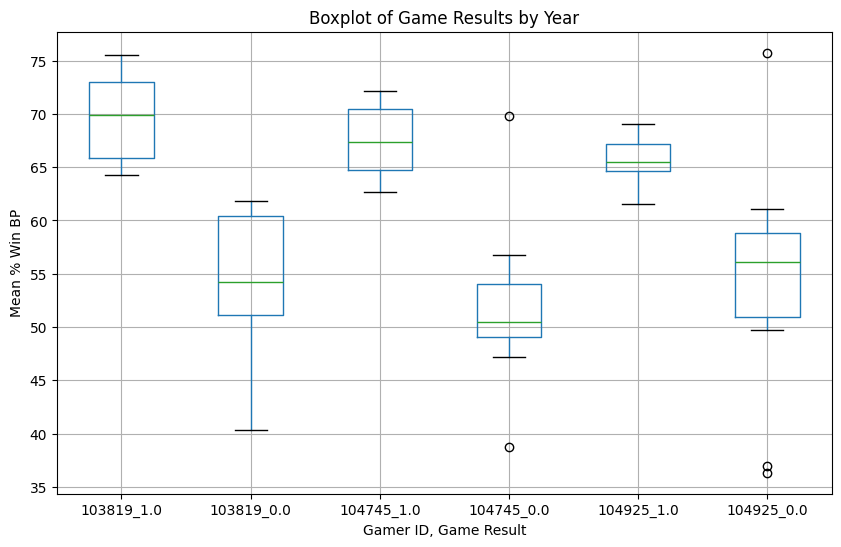

In [71]:
import matplotlib.pyplot as plt
ax = task_04_result_df.boxplot(figsize=(10, 6))
ax.set_title('Boxplot of Game Results by Year')
ax.set_xlabel('Gamer ID, Game Result')
ax.set_ylabel('Mean % Win BP')
plt.show()

In [74]:
H0 = 'распределения по годам идентичны для каждого игрока'
H1 = 'по крайней мере одно распределение отличается от остальных'

def run_kruskal_test(player_id, task_04_result_df):
    statistic, p_value = kruskal(task_04_result_df[f'{player_id}_1.0'], task_04_result_df[f'{player_id}_0.0'])
    result = f"Отвергаем нулевую гипотезу. Принимаем гипотезу {H1}" if p_value < 0.05 else f"Принимаем альтернативную гипотезу {H1}"
    print(f"Для игрока {player_id}: {result}")

for player in ids:
    run_kruskal_test(player, task_04_result_df)

Для игрока 103819: Отвергаем нулевую гипотезу. Принимаем гипотезу по крайней мере одно распределение отличается от остальных
Для игрока 104745: Отвергаем нулевую гипотезу. Принимаем гипотезу по крайней мере одно распределение отличается от остальных
Для игрока 104925: Отвергаем нулевую гипотезу. Принимаем гипотезу по крайней мере одно распределение отличается от остальных


In [73]:
from scipy.stats import kruskal 
def run_kruskal_wallis_test(task_04_result_df):
    
    for player in ids:
        player_data = task_04_result_df[[f'{player}_1.0', f'{player}_0.0']]
        statistic, p_value = kruskal(player_data[f'{player}_1.0'], player_data[f'{player}_0.0'])
        result = "Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны." if p_value < 0.05 else "Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы."
        print(f"Для игрока {player}: {result}")

    # Попарные сравнения с помощью теста Манна-Уитни
    for i in range(len(ids)):
        for j in range(i+1, len(ids)):
            player1_data = task_04_result_df[[f'{ids[i]}_1.0', f'{ids[i]}_0.0']]
            player2_data = task_04_result_df[[f'{ids[j]}_1.0', f'{ids[j]}_0.0']]
            _, p_value = mannwhitneyu(player1_data[f'{ids[i]}_1.0'], player2_data[f'{ids[j]}_1.0'], alternative='two-sided')
            adjusted_p_value = p_value * len(ids) * (len(ids) - 1) / 2  # Поправка Бонферрони
            comparison_result = "Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны." if adjusted_p_value < 0.05 else "Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы."
            print(f"Сравнение для игроков {ids[i]} и {ids[j]}: {comparison_result}")

run_kruskal_wallis_test(task_04_result_df)

Для игрока 103819: Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны.
Для игрока 104745: Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны.
Для игрока 104925: Отвергаем нулевую гипотезу: средние доли выигранных брейк-поинтов различны.
Сравнение для игроков 103819 и 104745: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.
Сравнение для игроков 103819 и 104925: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.
Сравнение для игроков 104745 и 104925: Принимаем нулевую гипотезу: средние доли выигранных брейк-поинтов одинаковы.


Являются ли эти распределения по годам (по победным и по проигранным матчам) независимыми для каждого из игроков?  - Являются.

Если сравнивать эту статистику между игроками — будет ли разница в средних для проигранных и выигранных матчей значимой попарно между всеми игроками? Разницы нет.

Задача 5: У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [76]:
# Выбор определенных столбцов и удаление строк с отсутствующими значениями
task_05 = combined_df[['year', 'winner_id', 'loser_id', 'w_bpSaved', 'w_bpFaced', 'l_bpSaved', 'l_bpFaced']].dropna()

# Вычисление показателей соотношения брейк-поинтов
task_05['bp_ratio_winner'] = round((task_05['w_bpSaved'] / task_05['w_bpFaced'] * 100), 1)
task_05['bp_ratio_loser'] = round((task_05['l_bpSaved'] / task_05['l_bpFaced'] * 100), 1)

# Удаление строк с отсутствующими значениями
task_05 = task_05.dropna()

# Создание DataFrame для победителей и проигравших
winners = task_05[['year', 'winner_id', 'bp_ratio_winner']].rename(columns={'winner_id': 'id', 'bp_ratio_winner': 'bp_ratio'})
losers = task_05[['year', 'loser_id', 'bp_ratio_loser']].rename(columns={'loser_id': 'id', 'bp_ratio_loser': 'bp_ratio'})

# Добавление столбца 'result'
winners['result'] = 1
losers['result'] = 0

# Удаление дублирующихся строк
task_05 = task_05.drop_duplicates()

# Объединение DataFrame
task_05 = pd.concat([winners, losers], ignore_index=True)
task_05 = task_05.drop_duplicates()

# Вычисление медианы показателя брейк-поинтов для победителей и проигравших
losers_median = losers.bp_ratio.median()
winners_median = winners.bp_ratio.median()

# Создание столбца 'breakpoints_level'
task_05['breakpoints_level'] = (task_05
                           .apply(lambda x: 
                                  'more median' if (x['bp_ratio'] >= winners_median and x['result'] == 1) else 
                                  'less median' if (x['bp_ratio'] < winners_median and x['result'] == 1) else 
                                  'more median' if (x['bp_ratio'] >= losers_median and x['result'] == 0) else 
                                  'less median' if (x['bp_ratio'] < losers_median and x['result'] == 0) else '', axis=1))


print(winners_median, losers_median)

66.7 52.9


In [77]:
task_05.groupby('result')['breakpoints_level'].value_counts().unstack()

breakpoints_level,less median,more median
result,,
0,29590,34648
1,21403,25917


In [78]:
count_of_games = task_05.groupby('result')['breakpoints_level'].value_counts().unstack()
count_of_games

breakpoints_level,less median,more median
result,,
0,29590,34648
1,21403,25917


In [79]:
count_of_games['less median'][0]

29590

Обоснование выбора теста: Парный Z-тест используется для сравнения средних значений двух связанных выборок. В вашем случае, если у вас есть две выборки, например, значения "breakpoints_level" для двух разных медианных значений "less median" и "more median", вы можете использовать парный Z-тест, чтобы определить, есть ли статистически значимая разница между этими двумя значениями.

In [80]:
# нулевая и альтернативная гипотезы
H0 = 'Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны'
H1 = 'Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=count_of_games['less median'],  
    nobs=count_of_games['more median'],  
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 

p-value:  0.0
Отвергаем нулевую гипотезу. Соотношения долей брейкпоинтов (больше / меньше медианы) -  в группах 0 и 1 равны
Альтернативная гипотеза. H1: Доля брейкпоинтов больше медианы -  в группе 0 выше, чем в группе 1
